In [43]:
import pandas as pd
import numpy as np

In [115]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the data file
file_path = "data.xlsx"

# Data Dictionary
data_dictionary = pd.read_excel(file_path, sheet_name = 0)

# Cars Data
engine_data = pd.read_excel(file_path, sheet_name = 1)

#### Information related to data 

In [3]:
data_dictionary

,Columns,Description,Variable
0,appointmentId,Unique id,Independent
1,inspectionStartTime,inspection date,Independent
2,year,registration year,Independent
3,month,registration month,Independent
4,engineTransmission_battery_value,condition ok: yes\nelse : no,Independent
...,...,...,...
68,engineTransmission_comments_value_3,comments,Independent
69,engineTransmission_comments_value_4,comments,Independent
70,fuel_type,fuel type,Independent
71,odometer_reading,mileage,Independent


In [5]:
rows, cols = engine_data.shape
print("Number of rows : {} & Number of columns: {}".format(rows, cols))


Number of rows : 26307 & Number of columns: 73


In [6]:
engine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 73 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   appointmentId                                              26307 non-null  object        
 1   inspectionStartTime                                        26307 non-null  datetime64[ns]
 2   year                                                       26307 non-null  int64         
 3   month                                                      26307 non-null  int64         
 4   engineTransmission_battery_value                           26307 non-null  object        
 5   engineTransmission_battery_cc_value_0                      3438 non-null   object        
 6   engineTransmission_battery_cc_value_1                      430 non-null    object        
 7   engineTransmission_battery_cc_v

We have large number of null values.

In [8]:
pd.set_option('display.max_rows', 73)
(engine_data.isnull().sum() * 100 / engine_data.shape[0]).sort_values(ascending=False)

engineTransmission_engineOil_cc_value_9                      100.000000
engineTransmission_engine_cc_value_10                        100.000000
engineTransmission_clutch_cc_value_6                          99.996199
engineTransmission_engineOil_cc_value_8                       99.992397
engineTransmission_engine_cc_value_9                          99.988596
engineTransmission_battery_cc_value_4                         99.984795
engineTransmission_engine_cc_value_8                          99.984795
engineTransmission_clutch_cc_value_5                          99.973391
engineTransmission_coolant_cc_value_3                         99.969590
engineTransmission_engine_cc_value_7                          99.969590
engineTransmission_engineOil_cc_value_7                       99.958186
engineTransmission_comments_value_4                           99.946782
engineTransmission_battery_cc_value_3                         99.939180
engineTransmission_engine_cc_value_6                          99

In [11]:

cols_with_more_than_40_null = engine_data.columns[engine_data.isnull().sum() * 100 / engine_data.shape[0] > 50]
print("Total number of variables with more than 50% null values: {}".format(len(cols_with_more_than_40_null)))

Total number of variables with more than 50% null values: 51


In [12]:
set_A = set(data_dictionary[data_dictionary['Description'] == "current condition if not yes"]['Columns'])
set_B = set(cols_with_more_than_40_null)

set_A.intersection(set_B)

{'engineTransmission_battery_cc_value_0',
 'engineTransmission_battery_cc_value_1',
 'engineTransmission_battery_cc_value_2',
 'engineTransmission_battery_cc_value_3',
 'engineTransmission_battery_cc_value_4',
 'engineTransmission_clutch_cc_value_0',
 'engineTransmission_clutch_cc_value_1',
 'engineTransmission_clutch_cc_value_2',
 'engineTransmission_clutch_cc_value_3',
 'engineTransmission_clutch_cc_value_4',
 'engineTransmission_clutch_cc_value_5',
 'engineTransmission_clutch_cc_value_6',
 'engineTransmission_coolant_cc_value_0',
 'engineTransmission_coolant_cc_value_1',
 'engineTransmission_coolant_cc_value_2',
 'engineTransmission_coolant_cc_value_3',
 'engineTransmission_engineMounting_cc_value_0',
 'engineTransmission_engineOilLevelDipstick_cc_value_0',
 'engineTransmission_engineOil_cc_value_1',
 'engineTransmission_engineOil_cc_value_2',
 'engineTransmission_engineOil_cc_value_3',
 'engineTransmission_engineOil_cc_value_4',
 'engineTransmission_engineOil_cc_value_5',
 'engineT

47 out of 53 variables have a description of "current condition if not yes"

In [13]:
null_var = [var for var in cols_with_more_than_40_null if var not in list(set_A.intersection(set_B))]
engine_data[null_var]


,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4
0,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
26302,Electrical wiring Damaged,NaN,NaN,NaN,NaN
26303,NaN,NaN,NaN,NaN,NaN
26304,NaN,NaN,NaN,NaN,NaN
26305,NaN,NaN,NaN,NaN,NaN


In [14]:
engine_data.drop(null_var, axis=1, inplace=True)

In [15]:
engine_data = engine_data.fillna("Yes")

In [16]:
engine_data.isnull().sum()

appointmentId                                                0
inspectionStartTime                                          0
year                                                         0
month                                                        0
engineTransmission_battery_value                             0
engineTransmission_battery_cc_value_0                        0
engineTransmission_battery_cc_value_1                        0
engineTransmission_battery_cc_value_2                        0
engineTransmission_battery_cc_value_3                        0
engineTransmission_battery_cc_value_4                        0
engineTransmission_engineoilLevelDipstick_value              0
engineTransmission_engineOilLevelDipstick_cc_value_0         0
engineTransmission_engineOil                                 0
engineTransmission_engineOil_cc_value_0                      0
engineTransmission_engineOil_cc_value_1                      0
engineTransmission_engineOil_cc_value_2                

In [17]:
categorical_columns = engine_data.select_dtypes('O').columns
continuous_columns = [cols for cols in engine_data.columns if cols not in categorical_columns]

In [18]:
len(categorical_columns), len(continuous_columns)

(63, 5)

###### There are a total 26307 rows & 73 columns (including target variable)..
###### 5 continuos varaibels (~72.22%) have more than 50% missing values.
###### Out of these 52 columns 47 are imputed with a constant value of "Yes" which is inferred from the given data dictionary.
###### Out of the remaining 68 variables, 63 are of categorical type (~92.6% of total) & 5 are continuous columns including the target variable

### Exploratory Data Analysis 

In [19]:
engine_data.describe()

,inspectionStartTime,year,month,odometer_reading,rating_engineTransmission
count,26307,26307.000000,26307.000000,26307.000000,26307.000000
mean,2019-02-24 04:17:07.174554624,2010.856578,5.462006,76460.143764,3.624663
min,2019-01-02 10:02:34,1989.000000,1.000000,1.000000,0.500000
25%,2019-01-29 13:54:15.500000,2008.000000,2.000000,46396.000000,3.500000
50%,2019-02-24 12:57:51,2011.000000,5.000000,72013.000000,4.000000
75%,2019-03-23 10:11:12.500000,2014.000000,9.000000,98289.500000,4.000000
max,2019-04-15 12:47:00,2019.000000,12.000000,999999.000000,5.000000
std,NaN,3.766234,3.583866,46762.524489,0.847645


odometer_reading reading min value is 1,which is very low.

### Spliting the inspection day to find the Remaining useful life of engine

In [20]:

inspectionDate = engine_data['inspectionStartTime'].dt.date
inspectionMonth = engine_data['inspectionStartTime'].dt.month
inspectionDay = engine_data['inspectionStartTime'].dt.day
inspectionWeekDay = engine_data['inspectionStartTime'].dt.dayofweek
inspectionHour = engine_data['inspectionStartTime'].dt.hour
inspectionyear = engine_data['inspectionStartTime'].dt.year

# Insert into the dataframe
engine_data.insert(2,'inspectionDate', inspectionDate)
engine_data.insert(3,'inspectionMonth', inspectionMonth)
engine_data.insert(4,'inspectionDay', inspectionDay)
engine_data.insert(5,'inspectionWeekDay', inspectionWeekDay)
engine_data.insert(6,'inspectionHour', inspectionHour)
engine_data.insert(7,'inspectionyear', inspectionyear)

#### Duration of car used & average km runs per year 

In [21]:
engine_data['duration_of_car_used']=engine_data['inspectionyear']-engine_data['year']

In [22]:
engine_data['avergae_km_peryear']=engine_data['odometer_reading']/engine_data['duration_of_car_used']

#### This dictionary has value of km life span of engines 
https://vehiclechef.com/car-engine-life-in-km/

In [23]:
engine_life = {'Petrol': 250000, 'Diesel': 300000, 'Petrol + LPG': 150000,'Electric':150000,'Petrol + CNG':150000,'Hybrid':150000}
engine_data['engine_life'] = engine_data['fuel_type'].map(engine_life)

In [24]:
engine_data['km_remaining']=engine_data['engine_life']-engine_data['odometer_reading']

#### This will give the idea of km remaining before reaching to end of the engine lifespan 

In [25]:
engine_data['RUL_of_engine']=engine_data['km_remaining']/engine_data['avergae_km_peryear']

#### RUL_of_engine gives the fuzzy way to find the the remaining useful life of engine. Greater the value better the engine is.

In [26]:
engine_data["RUL_of_engine"].describe()

count    2.630700e+04
mean     4.392342e+02
std      3.436088e+04
min     -1.273641e+01
25%      1.031339e+01
50%      1.854142e+01
75%      3.083179e+01
max      3.499986e+06
Name: RUL_of_engine, dtype: float64

#### For few data having negative value, which means that engine is not that good for those 

<Axes: xlabel='duration_of_car_used', ylabel='avergae_km_peryear'>

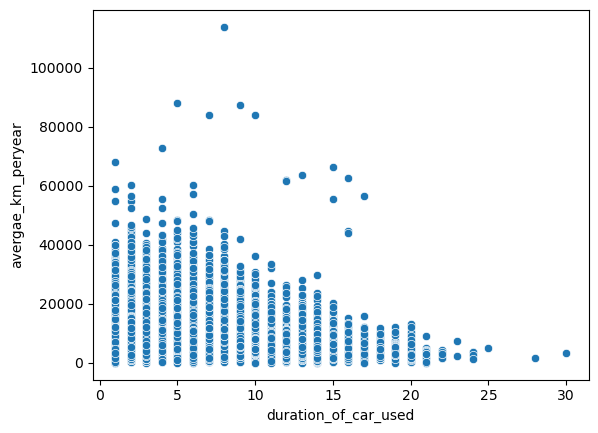

In [28]:
sns.scatterplot(data=engine_data, x="duration_of_car_used", y="avergae_km_peryear")

In [30]:
engine_data['avergae_km_peryear'].describe()

count    2.630700e+04
mean              inf
std               NaN
min      7.142857e-02
25%      6.261938e+03
50%      9.104667e+03
75%      1.296746e+04
max               inf
Name: avergae_km_peryear, dtype: float64

<Axes: xlabel='duration_of_car_used', ylabel='odometer_reading'>

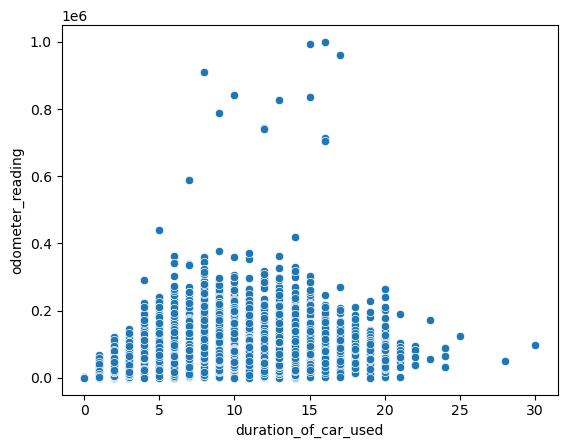

In [29]:
sns.scatterplot(data=engine_data, x="duration_of_car_used", y="odometer_reading")

#### We can see that , duration of car is more than 20 years but  odometer rating is very less. Reason : Either car is not used or Faulty ordometer reading

In [ ]:
cols_with_more_than_40_null = engine_data.columns[engine_data.isnull().sum() * 100 / engine_data.shape[0] > 40]
print("Total number of variables with more than 40% null values: {}".format(len(cols_with_more_than_40_null)))

NameError: name 'plt' is not defined

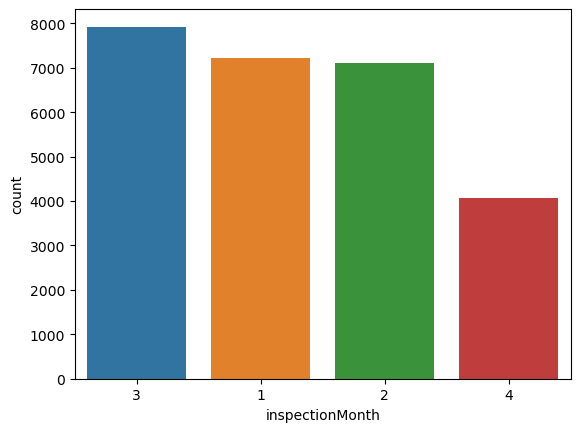

In [31]:
# Performing a similar analysis across months, days & weekdays
sns.countplot(data=engine_data, x='inspectionMonth', order=[3, 1, 2, 4])
plt.xticks(np.arange(0,4), labels = ["March", "January", "February", "April"])
plt.show()

In [34]:
month_dict = {1 : "January", 
              2 : "February",
              3 : "March", 
              4 : "April" 
              }

perc_data = (engine_data['inspectionMonth'].value_counts() * 100 / engine_data.shape[0]).to_frame()\
                                                                            .reset_index()\
                                                                            .rename(columns = {'index' : 'Months', 'inspectionMonth' : 'Distribution(%)'})


In [36]:
perc_data

,Distribution(%),count
0,3,30.125062
1,1,27.426160
2,2,27.011822
3,4,15.436956


maximum for March (~ 30%) followed by January (~ 27.4%), February(~ 27%) & April
(~ 15.4%)

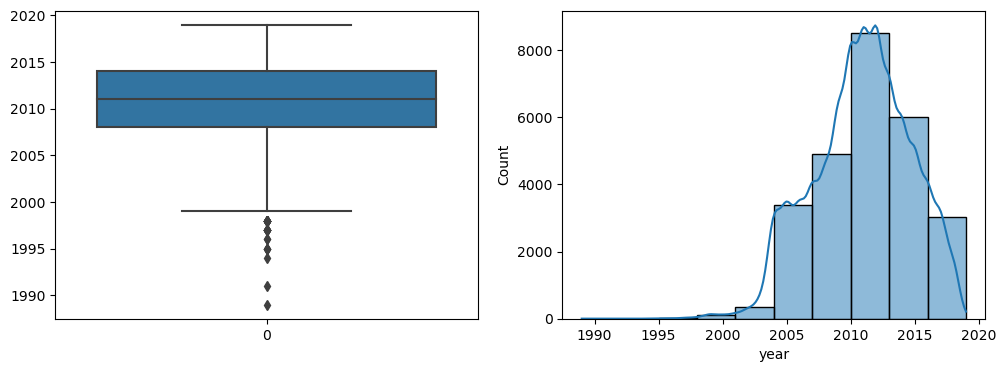

In [39]:
# Year: registeration year
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(engine_data['year'], ax=ax[0])
sns.histplot(engine_data['year'], bins=10, kde=True, ax=ax[1])
plt.show()

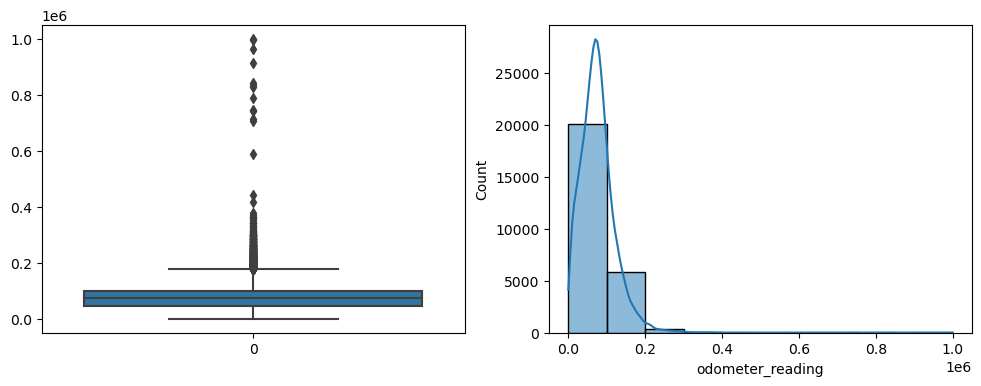

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(engine_data['odometer_reading'], ax=ax[0])
sns.histplot(engine_data['odometer_reading'], bins=10, kde=True, ax=ax[1])
plt.show()

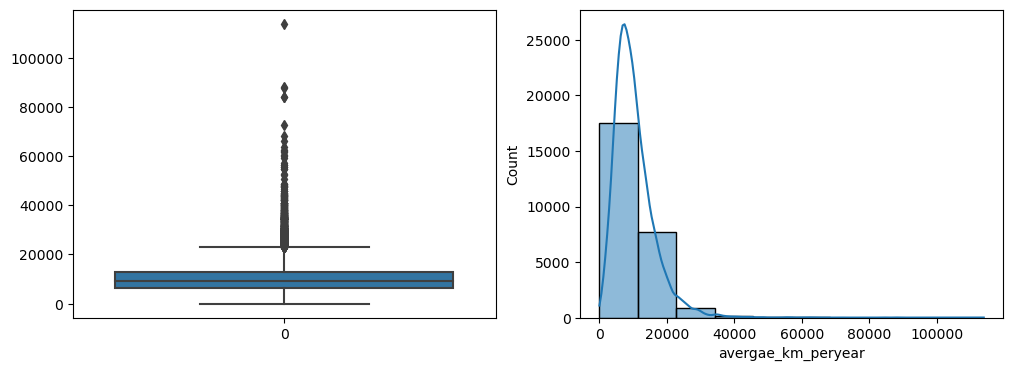

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(engine_data['avergae_km_peryear'], ax=ax[0])
sns.histplot(engine_data['avergae_km_peryear'], bins=10, kde=True, ax=ax[1])
plt.show()

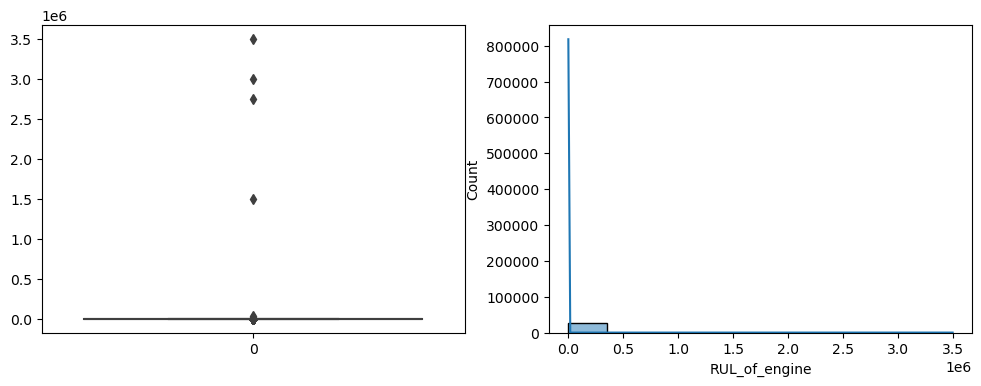

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(engine_data['RUL_of_engine'], ax=ax[0])
sns.histplot(engine_data['RUL_of_engine'], bins=10, kde=True, ax=ax[1])
plt.show()

In [ ]:
sm.qqplot(engine_data['odometer_reading'], line='s')
plt.show()

In [40]:
def remove_outlier(df, col):

# 1. Compute Quantiles
    q1 = np.quantile(df[col], .25)
    q3 = np.quantile(df[col], .75)

    IQR = q3 - q1

# 2. Compute the upper & lower limit
    upper_limit = q3 + 1.5 * IQR
    lower_limit = q1 - 1.5 * IQR
    return df[(df[col] < upper_limit) & (df[col] > lower_limit)]



In [47]:
engine_data = remove_outlier(engine_data, 'odometer_reading')
engine_data = remove_outlier(engine_data, 'RUL_of_engine')
engine_data = remove_outlier(engine_data, 'avergae_km_peryear')

TypeError: can only concatenate str (not "int") to str

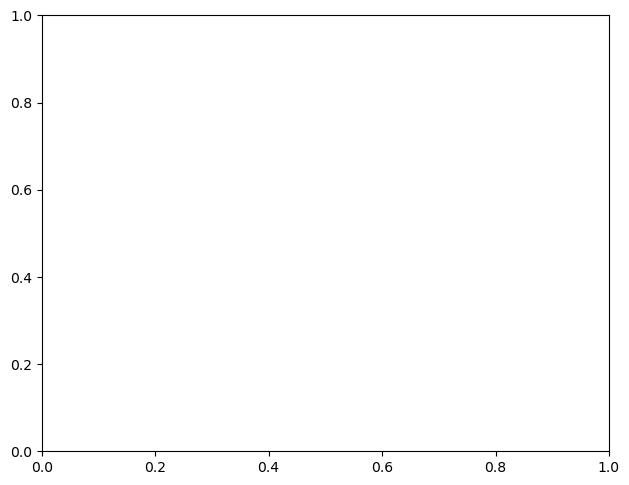

In [53]:
fig = plt.figure(figsize=(60, 60))
for i, col in enumerate(categorical_columns):
    plt.subplot(9, 7, i+1)
    sns.countplot(engine_data[col+1])
    plt.xticks(rotation=-45)
plt.show()

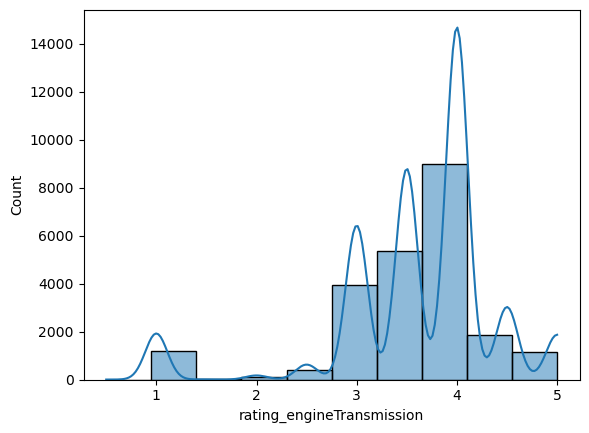

In [54]:
sns.histplot(data=engine_data, x='rating_engineTransmission', bins=10, kde=True)
plt.show()

In [56]:
# * rating_engineTransmission 0.5, 1.5 & 2.0 have a very low count (less than 1%).

In [55]:
engine_data['rating_engineTransmission'].value_counts() * 100 / engine_data.shape[0]

rating_engineTransmission
4.0    39.135738
3.5    23.427426
3.0    17.119707
4.5     8.063251
1.0     5.122844
5.0     4.979090
2.5     1.664053
2.0     0.457397
1.5     0.026137
0.5     0.004356
Name: count, dtype: float64

In [57]:
# Dropping appointmentId, inspectionStartTime & inspectionDate variables
engine_data.drop(['appointmentId', 'inspectionStartTime', 'inspectionDate', 'inspectionDay', 'inspectionWeekDay'], axis=1, inplace=True)

In [59]:
engine_data

,inspectionMonth,inspectionHour,inspectionyear,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,...,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,fuel_type,odometer_reading,rating_engineTransmission,duration_of_car_used,avergae_km_peryear,engine_life,km_remaining,RUL_of_engine
0,2,15,2019,2008,8,No,Weak,Yes,Yes,Yes,...,Yes,Yes,Petrol + CNG,124600,3.0,11,11327.272727,150000,25400,2.242376
1,1,13,2019,2007,5,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Petrol + CNG,78108,4.0,12,6509.000000,150000,71892,11.045015
2,2,13,2019,2012,5,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Diesel,93348,3.5,7,13335.428571,300000,206652,15.496465
3,1,11,2019,2013,1,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Petrol + CNG,48233,3.5,6,8038.833333,150000,101767,12.659424
4,1,12,2019,2011,7,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Petrol + CNG,74368,4.0,8,9296.000000,150000,75632,8.135972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26301,2,17,2019,2010,7,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Diesel,52417,3.0,9,5824.111111,300000,247583,42.510006
26302,3,13,2019,2013,3,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Petrol + CNG,64532,4.0,6,10755.333333,150000,85468,7.946569
26303,4,13,2019,2007,8,No,Weak,Yes,Yes,Yes,...,Yes,Yes,Petrol,88051,4.0,12,7337.583333,250000,161949,22.071163
26305,4,12,2019,2010,12,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Diesel,126015,4.5,9,14001.666667,300000,173985,12.426021


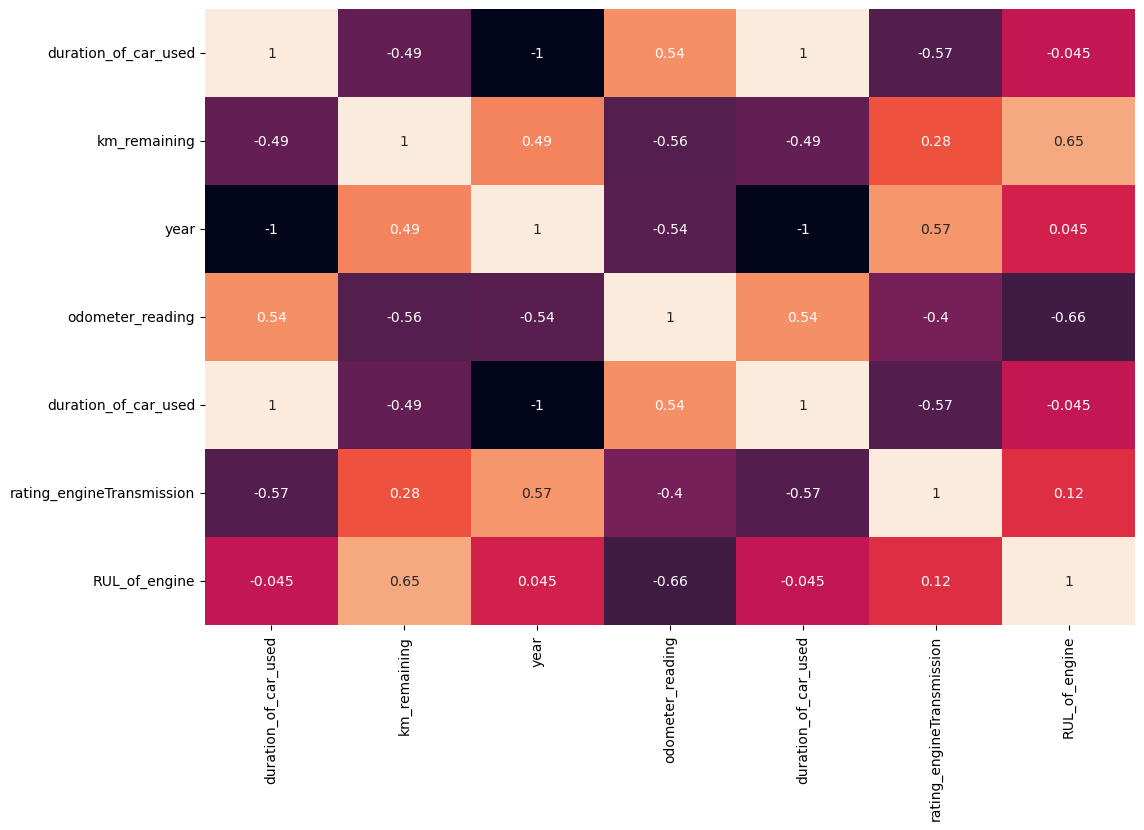

In [62]:
corr_matrix = engine_data[['duration_of_car_used','km_remaining','year','odometer_reading','duration_of_car_used','rating_engineTransmission','RUL_of_engine']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cbar=False)
plt.show()

In [65]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [66]:
# 1. Split into training set & target
train = engine_data.drop('rating_engineTransmission', axis=1).reset_index().drop('index', axis=1)
target = engine_data['rating_engineTransmission'].reset_index().drop('index', axis=1)

# 2. Encode the categorical variables
train_encoded = pd.get_dummies(train, drop_first=True)

# 3. Scale the data
mms = MinMaxScaler()
X = pd.DataFrame(mms.fit_transform(train_encoded), columns=train_encoded.columns)
y = target

In [69]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, VotingRegressor


In [70]:
# Split the data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
X_val.shape

(1504, 243)

#### Baseline Model 

In [99]:
engine_data['RandomColumn'] = np.random.uniform(0, 6, size=len(engine_data))

In [106]:
mse_random = mean_squared_error(engine_data['rating_engineTransmission'], engine_data['RandomColumn'])
print(f'Mean Squared Error (MSE): {mse}')

r2_random = r2_score(engine_data['rating_engineTransmission'], engine_data['RandomColumn'])
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 4.03276601400488
R-squared (R2): -5.027692704918458


#### KNN 

In [89]:
# Generating KFold Split for cross validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 1. Building KNN model
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

# Print the R squared scores
knn_train_score = knn.score(X_train, y_train)
knn_val_score = knn.score(X_val, y_val)

print(knn_train_score, knn_val_score)


0.7045614170091627 0.5182855090351739


In [90]:
pred=knn.predict(X_val)
mse = mean_squared_error(pred, y_val)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.29501557632398756


### Decision Tree 

In [97]:
# 2. Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Print the R squared scores
dt_train_score = dt.score(X_train, y_train)
dt_val_score = dt.score(X_val, y_val)
print(dt_train_score, dt_val_score)

1.0 0.30523578784640104


In [102]:
pred2=dt.predict(X_val)
mse_dt = mean_squared_error(pred2, y_val)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 4.03276601400488


### Random Forest 

In [95]:
# 3. Random Forest 
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Print the R squared scores
rf_train_score = rf.score(X_train, y_train)
rf_val_score = rf.score(X_val, y_val)
print(rf_train_score, rf_val_score)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9592221348897405 0.6549563541140282


In [101]:
pred3=rf.predict(X_val)
mse_rf = mean_squared_error(pred3, y_val)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 4.03276601400488


In [105]:
# Displaying the results
model_results_arr = {'train_socres' : [knn_train_score, dt_train_score, rf_train_score,], 
                     'validation_scores' : [knn_val_score, dt_val_score, rf_val_score],
                    'MSE' : [mse, mse_dt, mse_rf]}
results_df = pd.DataFrame(model_results_arr, index=['KNN', 'DecisionTree', 'RandomForest'])
results_df

,train_socres,validation_scores,MSE
KNN,0.704561,0.518286,4.032766
DecisionTree,1.000000,0.305236,0.425493
RandomForest,0.959222,0.654956,0.211314


In [107]:
mse_random,r2_random

(4.03276601400488, -5.027692704918458)

### We are comparing 4 model - Random, KNN, DT, Random Forest

KNN MSE is almost equal to Random model & also R2 is not good. KNN is not performing well.

## Random Forest is performing the best, having good mse compare to other & also the R2 

In [108]:
feature_importances = rf.feature_importances_
features = X.columns
feat_imp_df = pd.DataFrame({'Features' : features, 'Feature_Importance' : feature_importances})
feat_imp_df = feat_imp_df.sort_values(by='Feature_Importance')

In [110]:
feat_imp_df

,Features,Feature_Importance
138,engineTransmission_engine_cc_value_7_Sump Damaged,0.000000
141,engineTransmission_engine_cc_value_8_Turbo cha...,0.000000
139,engineTransmission_engine_cc_value_7_Turbo cha...,0.000000
36,engineTransmission_engineOil_cc_value_0_Low Pr...,0.000000
37,engineTransmission_engineOil_cc_value_0_Mixed ...,0.000000
...,...,...
160,engineTransmission_engineSound_value_Yes,0.055902
8,engine_life,0.055913
167,engineTransmission_engineSound_cc_value_0_Yes,0.072629
6,duration_of_car_used,0.175844


C:\Users\Dell\AppData\Local\Temp\ipykernel_15152\3033921482.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-notebook')


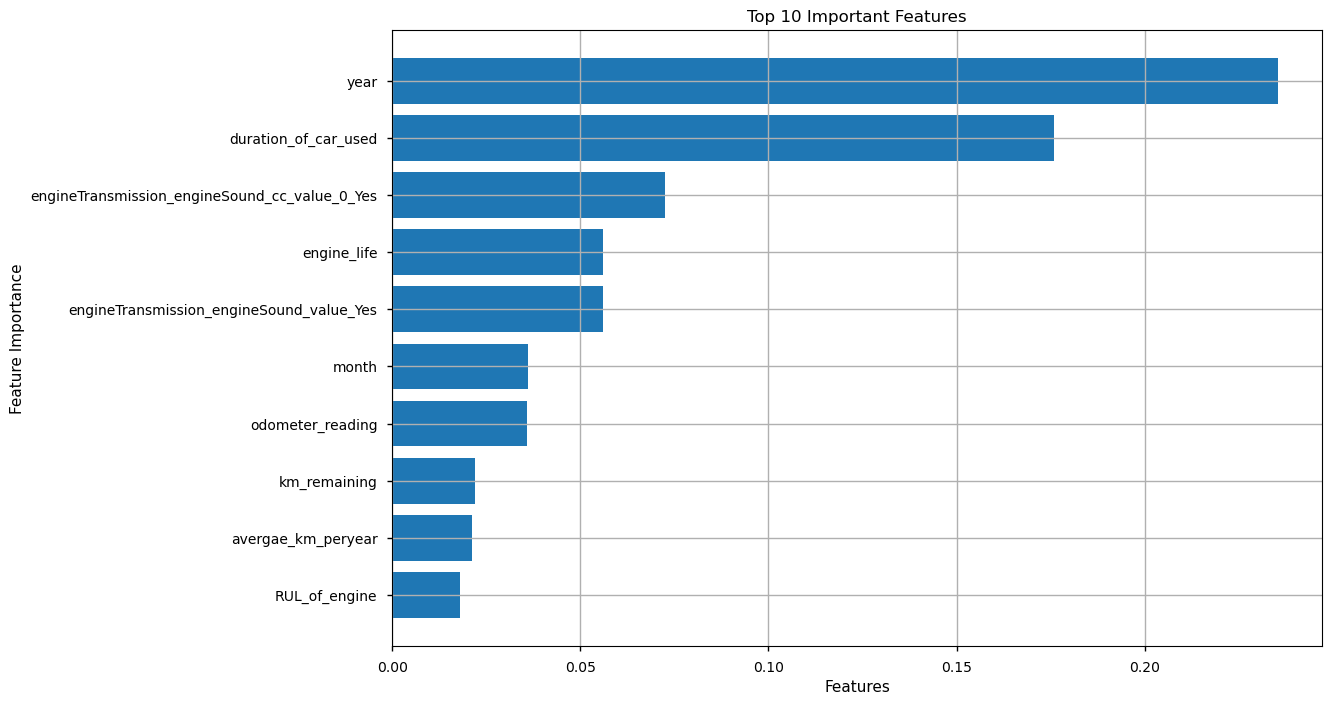

In [111]:
plt.style.use('seaborn-notebook')
plt.figure(figsize=(12, 8))
plt.barh(y=feat_imp_df.tail(10)['Features'], width=feat_imp_df.tail(10)['Feature_Importance'])
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Top 10 Important Features")
plt.grid()
plt.show()

## As we can see the new features "duration of car","RUL of engine","Km_remaining" having the feature importance 

C:\Users\Dell\AppData\Local\Temp\ipykernel_15152\716709841.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.round(pred3, 1), ax=ax, label='Predictions', bins=10)
C:\Users\Dell\AppData\Local\Temp\ipykernel_15152\716709841.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_val, ax=ax, lab

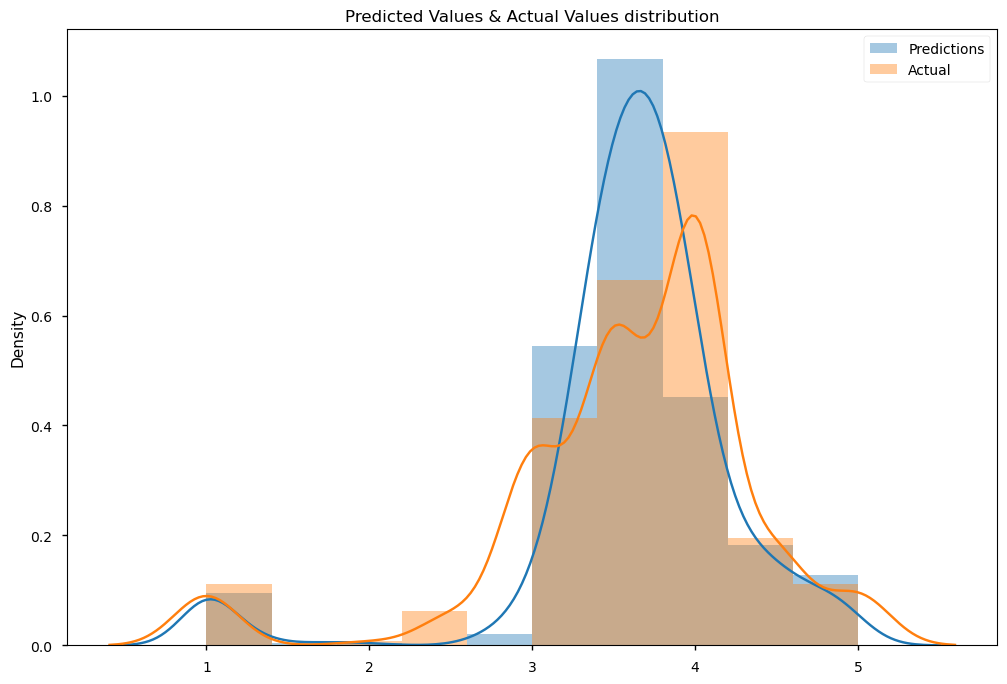

In [112]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.distplot(np.round(pred3, 1), ax=ax, label='Predictions', bins=10)
sns.distplot(y_val, ax=ax, label='Actual', bins=10)
ax.set_title("Predicted Values & Actual Values distribution")
ax.legend()
plt.show()

Average Error: 0.0
The variance of error: 0.21


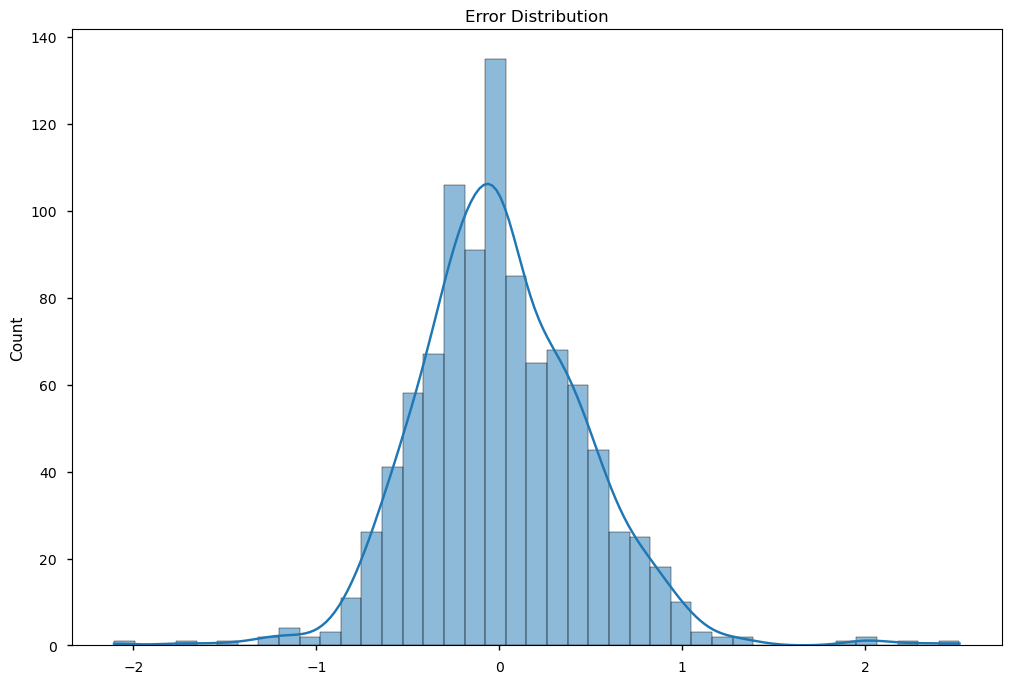

In [113]:
error = pred3 - y_val.values.reshape(-1,)
avg_error = np.mean(error)
error_var = np.std(error) ** 2
print("Average Error: {}".format(np.round(avg_error)))
print("The variance of error: {}".format(np.round(error_var, 2)))

# Plot the error distirbution
plt.figure(figsize=(12, 8))
sns.histplot(error, kde=True)
plt.title("Error Distribution")
plt.show()

In [117]:
# Computing the MAPE
mape = mean_absolute_percentage_error(y_val.values.reshape(-1,), pred3)
print("The mean absolute percentage error between the final predictions and the actual values: {}%".format(np.round(mape*100, 2)))

The mean absolute percentage error between the final predictions and the actual values: 10.81%


In [120]:
import pickle

In [121]:
final_model = rf
with open('final_model_rf', 'wb') as files:
    pickle.dump(final_model, files)